In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from scipy.stats import chi2_contingency, chi2, ttest_ind

## Load dataset

In [2]:
df = pd.read_csv('./dataset/adult.data', sep=', ', names=["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"])
df_test = pd.read_csv('./dataset/adult.test', sep=', ', names=["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"], skiprows=1)

/var/folders/ny/pghdg73j4n5d3qzmkwx50grw0000gn/T/ipykernel_41957/2705717221.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv('./dataset/adult.data', sep=', ', names=["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"])
/var/folders/ny/pghdg73j4n5d3qzmkwx50grw0000gn/T/ipykernel_41957/2705717221.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_test = pd.read_csv('./dataset/adult.test', sep=', ', names=["age", "workclass", "fnlwgt", "

## EDA

In [3]:
df.shape

(32561, 15)

In [4]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### check data types and missing values

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


From the table above, there are some founds:
- no missing values.

- 6 numerical (integer-type) features, which include age, fnlwgt, education-num, capital-gain, capital-loss, hours-per-week.

- The remaining 9 features are categorical.

### Explore numerical features

In [6]:
df.select_dtypes(include='int')

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40
...,...,...,...,...,...,...
32556,27,257302,12,0,0,38
32557,40,154374,9,0,0,40
32558,58,151910,9,0,0,40
32559,22,201490,9,0,0,20


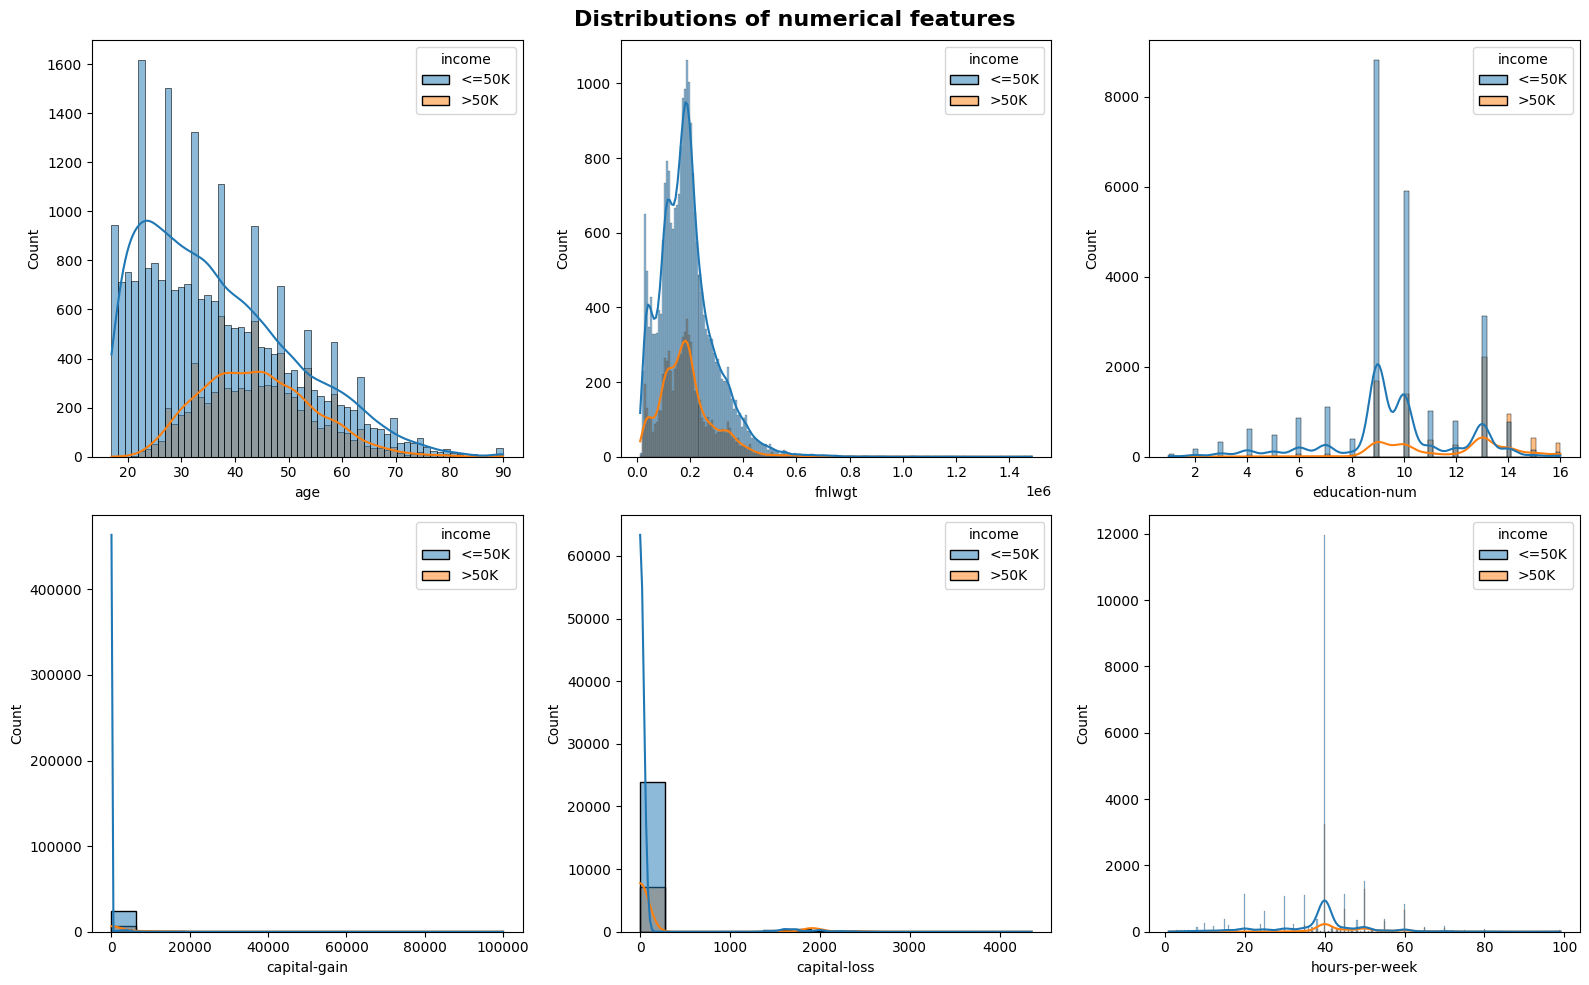

In [7]:
num_cols = df.select_dtypes(include='int').columns
rows, cols = 2, 3
fig, axes = plt.subplots(rows, cols, figsize=(16, 10))
fig.suptitle('Distributions of numerical features', fontsize = 16, fontweight = 'bold')
for i in range(rows * cols):
    sns.histplot(data=df, x=num_cols[i], hue='income', kde=True,ax=axes[i // cols, i % cols])
fig.tight_layout()


<AxesSubplot:xlabel='capital-gain', ylabel='Count'>

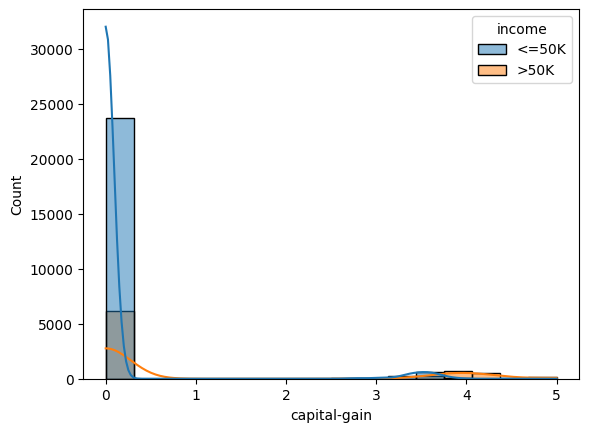

In [8]:
sns.histplot(x=np.log10(1 + df["capital-gain"]), hue=df['income'], kde=True)

<AxesSubplot:title={'center':'Correlation between numerical features'}>

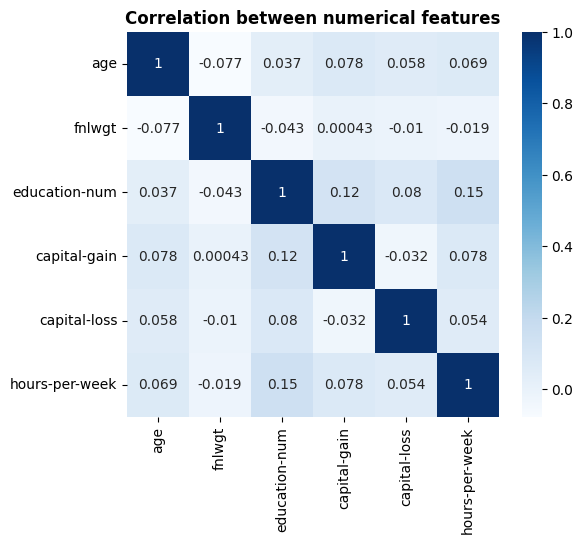

In [9]:
plt.figure(figsize = (6, 5))
plt.title("Correlation between numerical features", fontsize = 12, fontweight = 'bold')
sns.heatmap(df.corr(), cmap="Blues", annot=True)

Observations:
- Correlations between each pair of numerical features are relatively weak.

### Explore categorical features

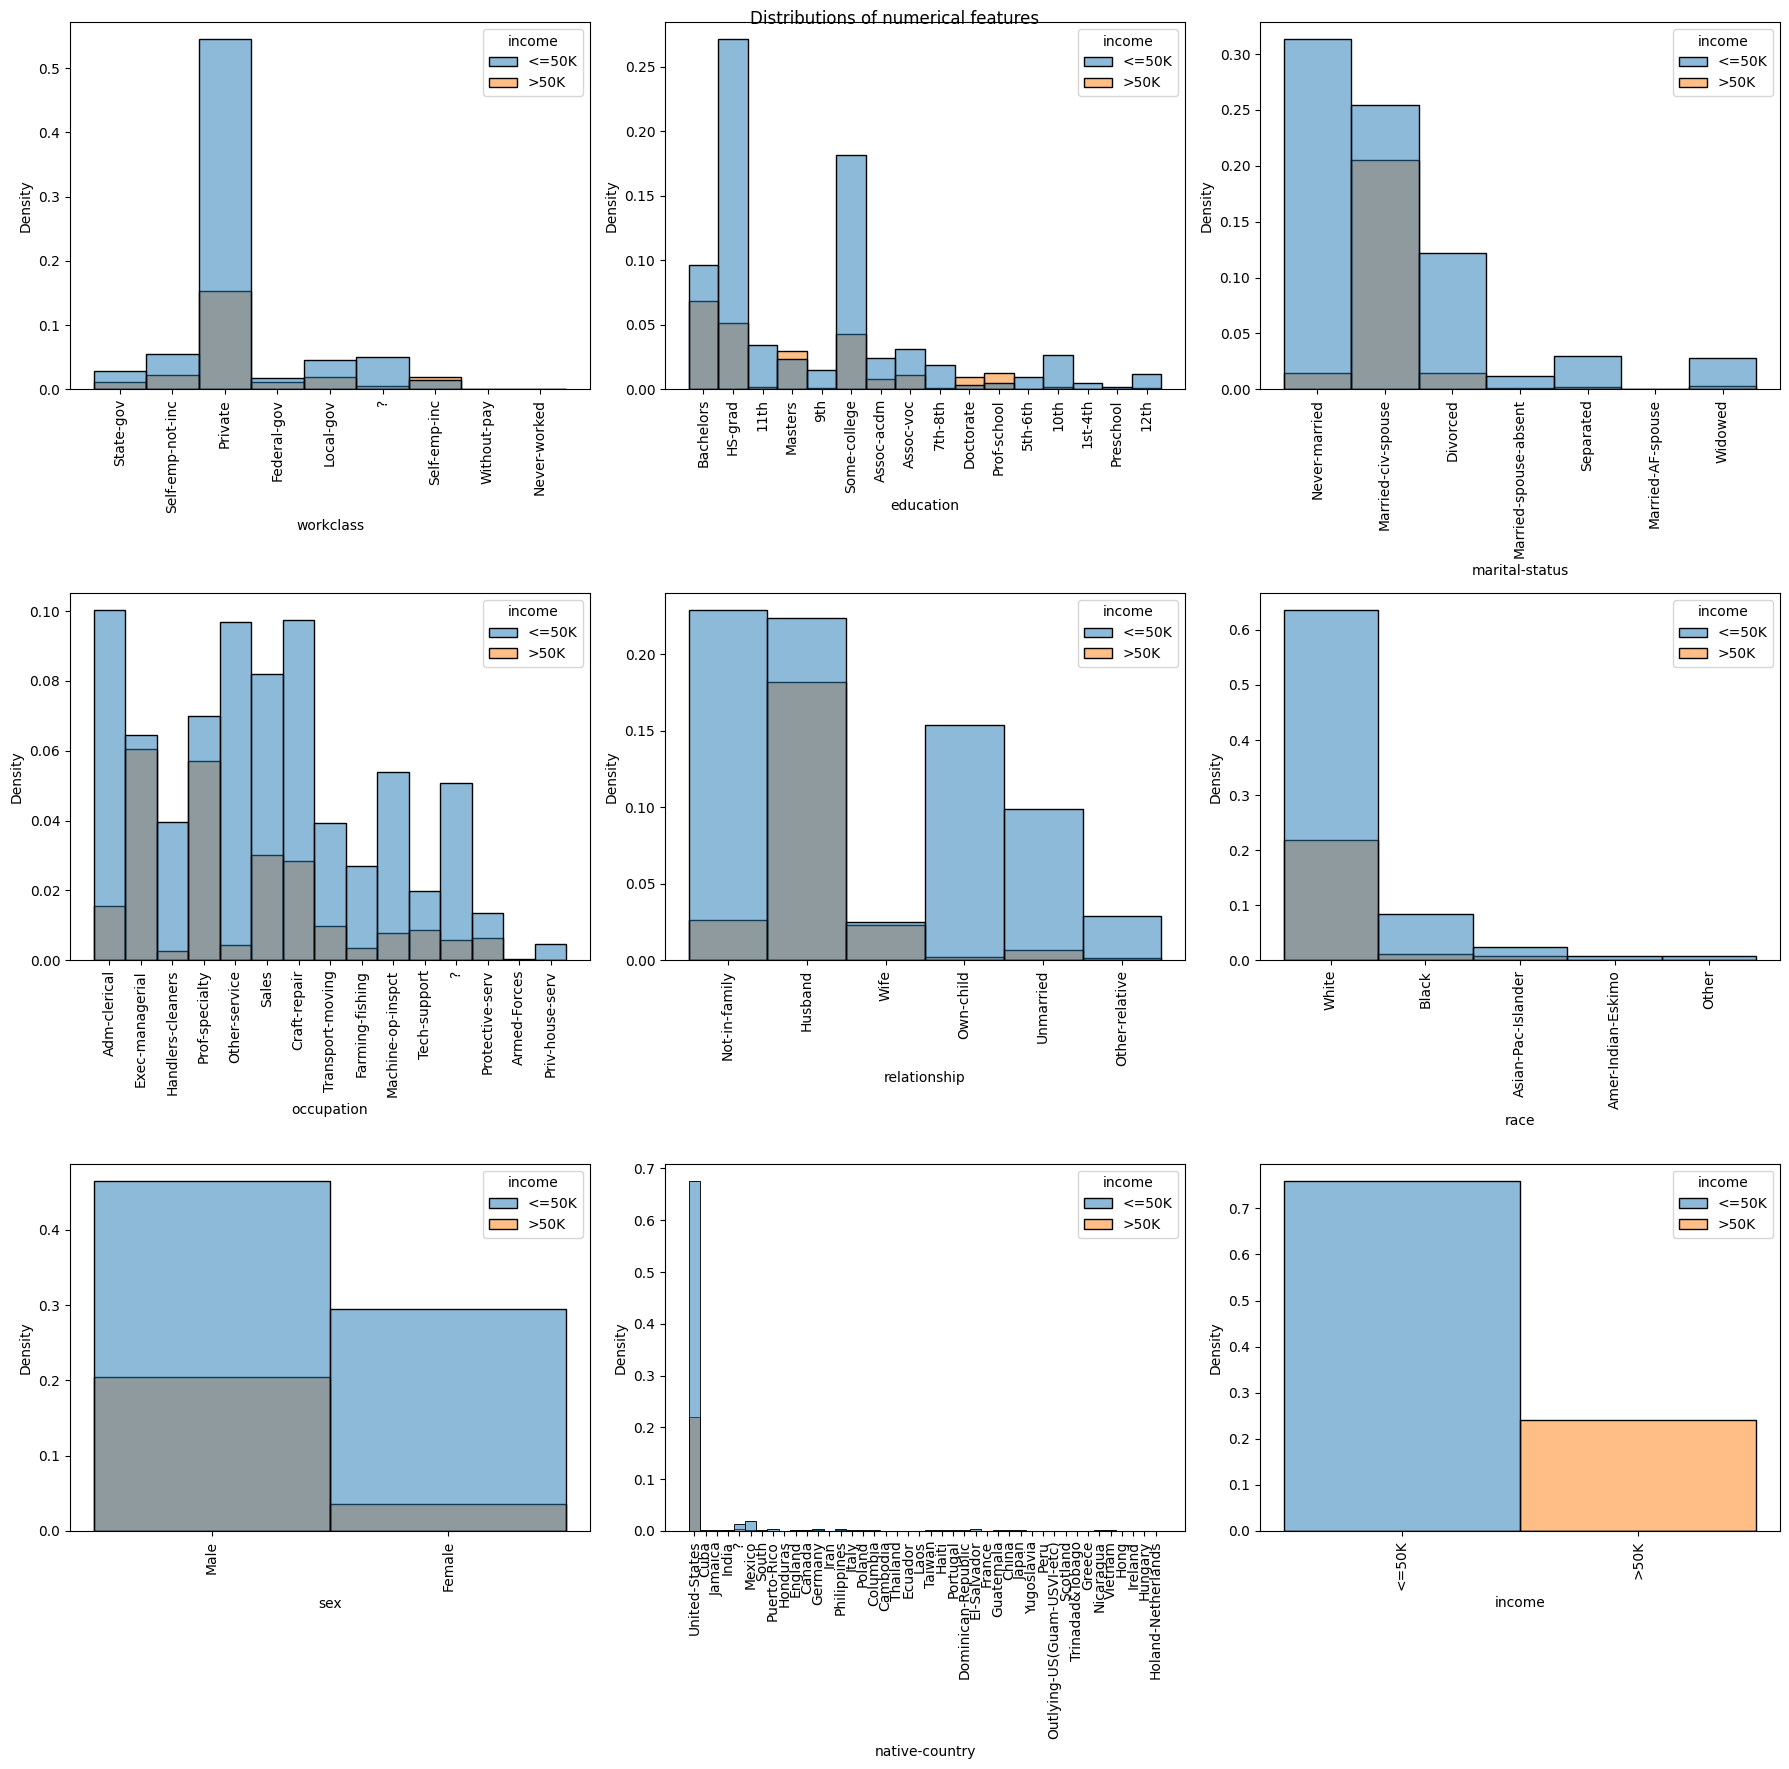

In [10]:
cat_cols = df.select_dtypes(exclude='int').columns
rows, cols = 3, 3
fig, axes = plt.subplots(rows, cols, figsize=(18, 18))
fig.suptitle('Distributions of numerical features')
for i in range(rows * cols):
    sns.histplot(df, x=cat_cols[i], stat='density', hue='income', ax=axes[i // cols, i % cols])
    axes[i // cols, i % cols].tick_params(axis='x', rotation=90)
fig.tight_layout()

From the graph above, we can observe that
- In workclass, occupation and native-country features, they contained an unexpected value: '?'.
- Income, the target variable is imbalanced, about 75% of people's income is "<=50k".


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education-num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital-gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital-loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours-per-week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [12]:
#sns.pairplot(df, hue='income')

## Data Cleaning

### Handling missing Values

In [13]:
# replace all '?' with np.NaN
df = df.replace('?', np.NaN)
df_test = df_test.replace('?', np.NaN)

# get number of missing values of each column
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

In [14]:
df_test.isnull().sum()

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64

In [15]:
# filling missing values with modes
for col in ['workclass', 'occupation', 'native-country']:
    df[col].fillna(df[col].mode()[0], inplace=True)
    df_test[col].fillna(df[col].mode()[0], inplace=True)

# get number of missing values of each column again
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [16]:
df_test.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

### Handling duplicates

In [17]:
df.duplicated().value_counts()

False    32537
True        24
dtype: int64

In [18]:
df = df.drop_duplicates()

In [19]:
# get unique pair values of education and education-num
(df['education'] + '-' + df['education-num'].map(str)).unique()

array(['Bachelors-13', 'HS-grad-9', '11th-7', 'Masters-14', '9th-5',
       'Some-college-10', 'Assoc-acdm-12', 'Assoc-voc-11', '7th-8th-4',
       'Doctorate-16', 'Prof-school-15', '5th-6th-3', '10th-6',
       '1st-4th-2', 'Preschool-1', '12th-8'], dtype=object)

In [20]:
# education feature and education-num feature have one-to-one mapping, which means
# these two columns are duplicated. Therefore, one of them can be dropped, 
# education-num feature is the one to be dropped
df = df.drop(columns=['education-num'])
df_test = df_test.drop(columns=['education-num'])

### Handling invalid Values

In [21]:
# replace income value in df_test
df_test["income"].replace(to_replace=["<=50K."], value="<=50K", inplace=True)
df_test["income"].replace(to_replace=[">50K."], value=">50K", inplace=True)

## Feature Engineering

### Feature transformation

In this section, selected numerical features are converted to categorical features first, and all categorical features are converted to the features in numerical representation.

#### Numerical featue transformation

Selected numerical features are transformed to categorical feature in numerical representation.

In [22]:
df_combined = df.copy()

def get_bin_idx(x, bins):
    if x >= bins[-1]:
        return len(bins) - 2
    elif x < bins[0]:
        return 0
    
    for i in range(len(bins) - 1):
        if bins[i] <= x < bins[i + 1]:
            return i

# transforming a continuous feature to ordinal feature which value started from 0
def binning(df, col_name: str, n_bins: int, method: str ='width'):
    if method == 'width':
        lower: float = df[col_name].min()
        upper: float = df[col_name].max()
        width: float = (upper - lower) / n_bins
        bins: list = [lower + i * width for i in range(n_bins + 1)]
        return df[col_name].apply(get_bin_idx, args=(bins,)), bins
    elif method == 'frequency':
        bins: list = [df[col_name].quantile(1 / n_bins * i) for i in range(n_bins + 1)]
        # remove bins that share same values
        unique_bins: bins = [bins[i] for i in range(len(bins) - 1) if bins[i] != bins[i+1]]
        unique_bins.append(bins[-1])

        return df[col_name].apply(get_bin_idx, args=(unique_bins,)), unique_bins

# transform the selected numerical features
df_combined["age"], age_bins = binning(df, "age", 8, method='frequency') #5, 8, 10
# df_combined["hours-per-week"], hours_per_week_bins = binning(df, "hours-per-week", 5, method='frequency')

print("age_bins: ", age_bins)
# print("hours_per_week_bins: ",  hours_per_week_bins)


age_bins:  [17.0, 23.0, 28.0, 32.0, 37.0, 42.0, 48.0, 56.0, 90.0]


In [23]:
df_test_combined = df_test.copy()

# convert value of age column of test data into bins
df_test_combined["age"] = df_test["age"].apply(get_bin_idx, args=(age_bins,))
# df_test_combined["hours-per-week"] = df_test["hours-per-week"].apply(get_bin_idx, args=(hours_per_week_bins,))

#### Categorical featue transformation


The categories of each categorical features will be integrated and transformed into numerical representations.

In [24]:
# For education category
df_combined["education"].replace(to_replace=["Preschool", "1st-4th", "5th-6th", "7th-8th", "9th", "10th", "11th", "12th"], value="Incomplete-k12", inplace=True)
df_combined["education"].replace(to_replace=["Assoc-voc", "Assoc-acdm"], value="Assoc", inplace=True)

df_test_combined["education"].replace(to_replace=["Preschool", "1st-4th", "5th-6th", "7th-8th", "9th", "10th", "11th", "12th"], value="Incomplete-k12", inplace=True)
df_test_combined["education"].replace(to_replace=["Assoc-voc", "Assoc-acdm"], value="Assoc", inplace=True)

# For marital-status
df_combined["marital-status"].replace(to_replace=["Married-spouse-absent", "Married-AF-spouse", "Separated"], value="Separated", inplace=True)

df_test_combined["marital-status"].replace(to_replace=["Married-spouse-absent", "Married-AF-spouse", "Separated"], value="Separated", inplace=True)

# For relationship
df_combined["relationship"].replace(to_replace=["Husband", "Wife"], value="Married", inplace=True)

df_test_combined["relationship"].replace(to_replace=["Husband", "Wife"], value="Married", inplace=True)


In [25]:
encoder = LabelEncoder()

cat_cols = ['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country']

# encode categorical features into numerical representation
for col in cat_cols:
    encoder.fit(df_combined[col])
    df_combined[col],  df_test_combined[col] = encoder.transform(df_combined[col]), encoder.transform(df_test_combined[col])

# encode the target variable into numerical representation
y_train = df_combined["income"].map({"<=50K": 0, ">50K": 1})
y_test = df_test_combined["income"].map({"<=50K": 0, ">50K": 1})


In [26]:
df_test_combined

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,1,3,226802,4,2,6,3,2,1,0,0,40,38,<=50K
1,4,3,89814,3,1,4,0,4,1,0,0,50,38,<=50K
2,2,1,336951,0,1,10,0,4,1,0,0,40,38,>50K
3,5,3,160323,7,1,6,0,2,1,7688,0,40,38,>50K
4,0,3,103497,7,2,9,3,4,0,0,0,30,38,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,4,3,215419,1,0,9,1,4,0,0,0,36,38,<=50K
16277,7,3,321403,3,4,9,2,2,1,0,0,40,38,<=50K
16278,4,3,374983,1,1,9,0,4,1,0,0,50,38,<=50K
16279,5,3,83891,1,0,0,3,1,1,5455,0,40,38,<=50K


### Feature selection

Using a logistic regression model with an L1 penalty to get each feature's importance by its coefficients.

In [27]:
#drop income column from input features
df_combined.drop(columns=["income"], inplace=True)
df_test_combined.drop(columns=["income"], inplace=True)

In [28]:
from sklearn.linear_model import LogisticRegression

X_train = df_combined.to_numpy()

model = LogisticRegression(penalty='l1', solver='liblinear')
model.fit(df_combined, y_train)
pd.DataFrame(model.coef_, columns=df_combined.columns, index=['coefficient']).T

,coefficient
age,1.910487e-01
workclass,-1.101832e-01
fnlwgt,3.413526e-07
education,-6.642359e-02
marital-status,-2.386075e-01
occupation,1.374414e-02
relationship,-9.270165e-01
race,6.585316e-02
sex,1.701549e-01
capital-gain,3.184878e-04


In [29]:
# drop fnlwgt feature
df_combined.drop(columns=['fnlwgt'], inplace=True)
df_test_combined.drop(columns=['fnlwgt'], inplace=True)

In [30]:
# df_combined.drop(columns=["relationship"], inplace=True)
# df_test_combined.drop(columns=["relationship"], inplace=True)

# df_combined.drop(columns=["occupation"], inplace=True)
# df_test_combined.drop(columns=["occupation"], inplace=True)

# df_combined.drop(columns=["native-country"], inplace=True)
# df_test_combined.drop(columns=["native-country"], inplace=True)

# df_combined.drop(columns=["workclass"], inplace=True)
# df_test_combined.drop(columns=["workclass"], inplace=True)

# df_combined.drop(columns=["race"], inplace=True)
# df_test_combined.drop(columns=["race"], inplace=True)

In [31]:
df_combined.duplicated().value_counts()

False    22940
True      9597
dtype: int64

In [32]:
# check if the input features are ready
df_combined.head()

,age,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,4,6,1,2,0,1,4,1,2174,0,40,38
1,6,5,1,1,3,0,4,1,0,0,13,38
2,4,3,3,0,5,1,4,1,0,0,40,38
3,6,3,4,1,5,0,2,1,0,0,40,38
4,2,3,1,1,9,0,2,0,0,0,40,4


In [33]:
df_test_combined.head()

,age,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,1,3,4,2,6,3,2,1,0,0,40,38
1,4,3,3,1,4,0,4,1,0,0,50,38
2,2,1,0,1,10,0,4,1,0,0,40,38
3,5,3,7,1,6,0,2,1,7688,0,40,38
4,0,3,7,2,9,3,4,0,0,0,30,38


## CART

In [35]:
# convert the input features from DataFrame/Series to numpy array
X_train = df_combined.to_numpy()
y_train = y_train.to_numpy()

X_test = df_test_combined.to_numpy()
y_test = y_test.to_numpy()

In [37]:
from CART import *
model = CART(min_samples_split=100)
model.fit(X_train, y_train)

In [38]:
y_pred = model.predict(X_train)
print("Train Accuracy:",metrics.accuracy_score(y_train, y_pred))
report = metrics.classification_report(y_train, y_pred, target_names=["<=50K", ">50K"], output_dict=True)
report["accuracy"] = {'precision': report["accuracy"], 'recall': report["accuracy"], 
                      'f1-score': report["accuracy"], "support": report["macro avg"]["support"]}
train_report = pd.DataFrame(report)

Train Accuracy: 0.8762946799028798


In [39]:
y_pred = model.predict(X_test)
print("Test Accuracy:",metrics.accuracy_score(y_test, y_pred))
report = metrics.classification_report(y_test, y_pred, target_names=["<=50K", ">50K"], output_dict=True)
report["accuracy"] = {'precision': report["accuracy"], 'recall': report["accuracy"], 
                      'f1-score': report["accuracy"], "support": report["macro avg"]["support"]}
test_report = pd.DataFrame(report)

Test Accuracy: 0.8559056569006818


In [40]:
report = pd.concat([train_report, test_report], keys=["Train", "Test"])
report

<=50K         >50K      accuracy     macro avg  \
Train precision      0.900935     0.782268      0.876295      0.841601   
      recall         0.940441     0.674193      0.876295      0.807317   
      f1-score       0.920264     0.724221      0.876295      0.822242   
      support    24698.000000  7839.000000  32537.000000  32537.000000   
Test  precision      0.887889     0.728938      0.855906      0.808414   
      recall         0.928589     0.620905      0.855906      0.774747   
      f1-score       0.907783     0.670598      0.855906      0.789191   
      support    12435.000000  3846.000000  16281.000000  16281.000000   

                 weighted avg  
Train precision      0.872345  
      recall         0.876295  
      f1-score       0.873032  
      support    32537.000000  
Test  precision      0.850341  
      recall         0.855906  
      f1-score       0.851754  
      support    16281.000000